In [6]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Avacado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.keys()

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [14]:
target = df['AveragePrice']
features = df.drop('AveragePrice', axis = 1)

In [16]:
target

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [19]:
df.shape

(18249, 13)

In [23]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [24]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

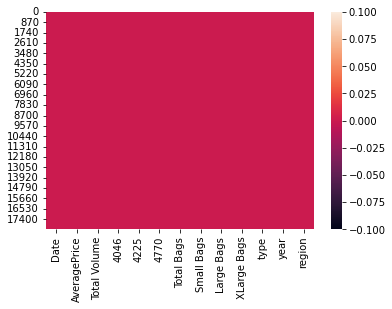

In [25]:
sns.heatmap(df.isnull())

In [26]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [27]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [30]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [31]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.676360,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252
1,0.696857,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252
2,0.717355,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252
3,0.737853,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252
4,0.758350,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.578371,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811
18245,1.557874,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811
18246,1.537376,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811
18247,1.516879,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811


In [33]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [34]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [35]:
from scipy.stats import boxcox

In [36]:
df['Total Volume']=boxcox(df['Total Volume'],.5)

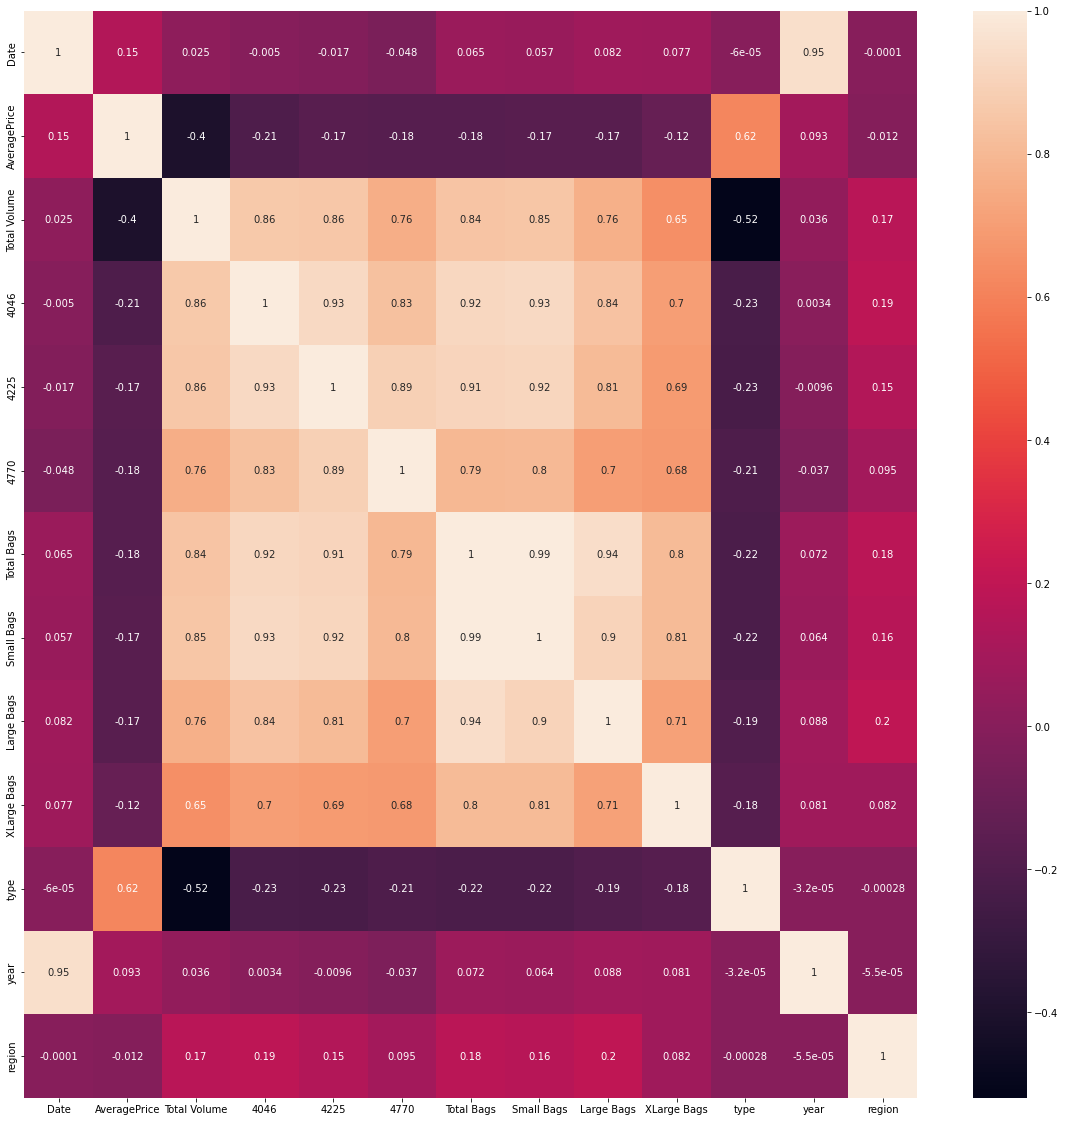

In [44]:
corr_hmap=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

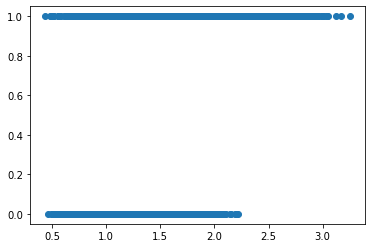

In [46]:
plt.scatter(df['AveragePrice'], df['type'])
plt.show()

In [48]:
df.drop('type', axis=1, inplace=True)

In [49]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,51.0,1.33,504.898885,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0.0
1,50.0,1.35,466.516723,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0.0
2,49.0,0.93,685.663348,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0.0
3,48.0,1.08,560.110843,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0.0
4,47.0,1.28,449.838909,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0.0


In [50]:
df_new=df[(z<3).all(axis=1)]

In [51]:
df.shape

(18249, 12)

In [52]:
df_new.shape

(17651, 12)

In [53]:
df=df_new
df.shape

(17651, 12)

In [56]:
x=df.iloc[:,2:]
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,504.898885,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0.0
1,466.516723,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0.0
2,685.663348,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0.0
3,560.110843,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0.0
4,449.838909,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0.0


In [64]:
y=df['AveragePrice']
y.head()


0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [65]:
x.shape

(17651, 10)

In [66]:
y.shape

(17651,)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=42)

In [68]:
x_train.shape

(17618, 10)

In [70]:
y_train.shape

(17618,)

In [69]:
x_test.shape

(33, 10)

In [71]:
y_test.shape

(33,)

In [72]:
lm=LinearRegression()

In [73]:
lm.fit(x_train,y_train)

LinearRegression()

In [75]:
lm.coef_

array([-5.17806370e-04,  1.81540711e-07,  4.96463036e-07,  1.63556289e-09,
        3.17986594e-02, -3.17982602e-02, -3.17984122e-02, -3.17947852e-02,
        4.88919511e-02,  1.31967826e-03])

In [76]:
lm.intercept_

-96.8844199641401

In [77]:
lm.score(x_train,y_train)

0.36502284880132463

In [78]:
pred=lm.predict(x_test)
print("Predicted result price",pred)
print("Actual price",y_test)

Predicted result price [0.97852445 1.19430914 1.44919642 1.16898716 1.51634886 1.25325308
 0.84022943 1.42450836 1.49027489 1.61723796 1.56731331 1.58073362
 1.27322157 1.35645286 1.17141606 1.27015888 1.41643737 1.63056404
 1.5241779  1.08078539 1.66229815 1.34818214 1.73973241 1.63344755
 1.57856469 1.69194512 1.70804733 1.3711057  1.28327735 1.3985325
 1.06194298 1.64230007 1.62524866]
Actual price 3596     1.36
7141     1.70
4625     1.22
5456     0.81
10969    1.85
5448     1.10
5217     1.11
10453    1.65
5382     1.43
15656    1.82
1539     1.26
9350     1.97
6139     0.65
5989     1.26
2244     1.14
4762     1.18
8948     0.93
16695    1.59
11549    1.78
659      1.19
16003    0.56
15100    1.57
17238    2.20
7184     1.71
9518     2.06
14904    1.77
16027    1.90
200      0.99
753      1.16
4864     0.99
322      1.07
17824    1.43
15027    1.34
Name: AveragePrice, dtype: float64


In [79]:
print('error :')
print("Mean absolute error:", mean_absolute_error(y_test,pred))
print("Mean squared error:", mean_squared_error(y_test,pred))

print("Root mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

error :
Mean absolute error: 0.278221840408842
Mean squared error: 0.12317546964843067
Root mean squared error: 0.3509636300935336


In [80]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.24316339842683055


In [81]:
# Lets predict price

In [84]:
p=np.array([0.0055,10.0,3.51,0.68,5.255,43.7,1.0700,5.0,9.3,222.5])

In [85]:
p.shape

(10,)

In [86]:
p=p.reshape(1,-1)
p.shape

(1, 10)

In [88]:
lm.predict(p)

array([-97.55157593])